<a href="https://colab.research.google.com/github/georgeduranh/ML/blob/main/3_deep_learning/binary_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from keras.datasets import imdb
from keras import models, layers, optimizers
import matplotlib.pyplot as plt

from keras import regularizers


In [ ]:
(train_data, train_labels ), (test_data, test_labels)=  imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 1s 0us/step


In [ ]:
train_data.shape

(25000,)

In [ ]:
train_labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:
word_index = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [ ]:
word_index=  dict([(value,key) for (key,value) in word_index.items()])

In [ ]:
for _ in train_data[0]:
  print(word_index.get(_-3))


None
this
film
was
just
brilliant
casting
location
scenery
story
direction
everyone's
really
suited
the
part
they
played
and
you
could
just
imagine
being
there
robert
None
is
an
amazing
actor
and
now
the
same
being
director
None
father
came
from
the
same
scottish
island
as
myself
so
i
loved
the
fact
there
was
a
real
connection
with
this
film
the
witty
remarks
throughout
the
film
were
great
it
was
just
brilliant
so
much
that
i
bought
the
film
as
soon
as
it
was
released
for
None
and
would
recommend
it
to
everyone
to
watch
and
the
fly
fishing
was
amazing
really
cried
at
the
end
it
was
so
sad
and
you
know
what
they
say
if
you
cry
at
a
film
it
must
have
been
good
and
this
definitely
was
also
None
to
the
two
little
boy's
that
played
the
None
of
norman
and
paul
they
were
just
brilliant
children
are
often
left
out
of
the
None
list
i
think
because
the
stars
that
play
them
all
grown
up
are
such
a
big
profile
for
the
whole
film
but
these
children
are
amazing
and
should
be
praised
for
what
they
ha

In [ ]:
# Keras
#Vectorization --> one hot encoding  to use this data with Keras

def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults 

In [ ]:
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
#Model - sequential
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train =  y_train[10000:]

In [ ]:
#saving data
history = model.fit(partial_x_train, partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/4
30/30 [==============================] - 4s 42ms/step - loss: 0.5264 - accuracy: 0.7777 - val_loss: 0.3986 - val_accuracy: 0.8664
Epoch 2/4
30/30 [==============================] - 1s 21ms/step - loss: 0.3113 - accuracy: 0.9037 - val_loss: 0.3265 - val_accuracy: 0.8714
Epoch 3/4
30/30 [==============================] - 1s 21ms/step - loss: 0.2257 - accuracy: 0.9253 - val_loss: 0.2785 - val_accuracy: 0.8915
Epoch 4/4
30/30 [==============================] - 1s 20ms/step - loss: 0.1755 - accuracy: 0.9429 - val_loss: 0.2744 - val_accuracy: 0.8899


In [ ]:
#results
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epoch = range (1, len(loss_values)+1)

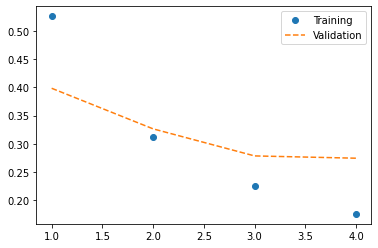

In [ ]:
plt.plot(epoch, loss_values, 'o', label = 'Training')
plt.plot(epoch, val_loss_values, '--', label = 'Validation')
plt.legend()
plt.show()


In [ ]:
model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2955 - accuracy: 0.8816


[0.29551467299461365, 0.881600022315979]

In [ ]:
predictions = model.predict(x_test)

782/782 [==============================] - 1s 2ms/step


In [ ]:
predictions[0]

array([0.2542046], dtype=float32)

In [ ]:
#Reducing the overfitting
#saving data
history = model.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1413 - accuracy: 0.9546 - val_loss: 0.2822 - val_accuracy: 0.8907
Epoch 2/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1135 - accuracy: 0.9657 - val_loss: 0.2950 - val_accuracy: 0.8859
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0944 - accuracy: 0.9711 - val_loss: 0.3287 - val_accuracy: 0.8790
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0753 - accuracy: 0.9794 - val_loss: 0.3334 - val_accuracy: 0.8817
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.0617 - accuracy: 0.9835 - val_loss: 0.3956 - val_accuracy: 0.8680
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0508 - accuracy: 0.9870 - val_loss: 0.3814 - val_accuracy: 0.8788
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0400 - accuracy: 0.9907 - val_loss: 0.4107 - val_accuracy: 0.8760
Epoch 8/20
30

In [ ]:
#Model - sequential  -- less complex
model2 = models.Sequential()
model2.add(layers.Dense(4, activation='relu', input_shape=(10000,)))
model2.add(layers.Dense(4, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history2 = model2.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 40ms/step - loss: 0.6207 - accuracy: 0.7124 - val_loss: 0.5599 - val_accuracy: 0.8093
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4979 - accuracy: 0.8607 - val_loss: 0.4681 - val_accuracy: 0.8683
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4041 - accuracy: 0.8949 - val_loss: 0.3950 - val_accuracy: 0.8764
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.3321 - accuracy: 0.9085 - val_loss: 0.3469 - val_accuracy: 0.8821
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2798 - accuracy: 0.9200 - val_loss: 0.3195 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2417 - accuracy: 0.9273 - val_loss: 0.2970 - val_accuracy: 0.8870
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2129 - accuracy: 0.9359 - val_loss: 0.2835 - val_accuracy: 0.8896
Epoch 8/20
30

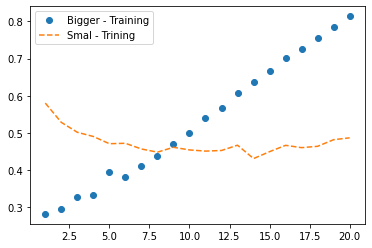

In [ ]:
#results
history_dict = history.history
loss_values = history_dict['val_loss']
loss_values_2 = history2.history['val_loss']

epoch = range (1, len(loss_values)+1)

plt.plot(epoch, loss_values, 'o', label = 'Bigger - Training')
plt.plot(epoch, loss_values_2, '--', label = 'Smal - Trining')
plt.legend()
plt.show()

Regularization

In [ ]:
#Model - sequential 
model3 = models.Sequential()
model3.add(layers.Dense(16, activation='relu', input_shape=(10000,),
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(16, activation='relu',
                        kernel_regularizer=regularizers.l2(0.001)))
model3.add(layers.Dense(1, activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history3 = model3.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 37ms/step - loss: 0.5477 - accuracy: 0.7876 - val_loss: 0.4214 - val_accuracy: 0.8686
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3509 - accuracy: 0.9039 - val_loss: 0.3796 - val_accuracy: 0.8643
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2821 - accuracy: 0.9208 - val_loss: 0.3374 - val_accuracy: 0.8855
Epoch 4/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2489 - accuracy: 0.9340 - val_loss: 0.3494 - val_accuracy: 0.8775
Epoch 5/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2249 - accuracy: 0.9425 - val_loss: 0.3268 - val_accuracy: 0.8877
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2098 - accuracy: 0.9473 - val_loss: 0.3341 - val_accuracy: 0.8862
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1957 - accuracy: 0.9553 - val_loss: 0.3432 - val_accuracy: 0.8828
Epoch 8/20
30

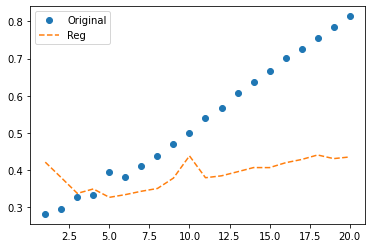

In [ ]:
#results
history_dict = history.history
loss_values = history_dict['val_loss']
loss_values_3 = history3.history['val_loss']

epoch = range (1, len(loss_values)+1)

plt.plot(epoch, loss_values, 'o', label = 'Original')
plt.plot(epoch, loss_values_3, '--', label = 'Reg')
plt.legend()
plt.show()

Dropout

In [ ]:
#Model - sequential  -- less complex
model4 = models.Sequential()
model4.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model4.add(layers.Dropout(0.5))

model4.add(layers.Dense(16, activation='relu'))
model4.add(layers.Dropout(0.5))

model4.add(layers.Dense(1, activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history4 = model4.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 35ms/step - loss: 0.6715 - accuracy: 0.5621 - val_loss: 0.6051 - val_accuracy: 0.8071
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5884 - accuracy: 0.6803 - val_loss: 0.4880 - val_accuracy: 0.8624
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.5087 - accuracy: 0.7503 - val_loss: 0.4050 - val_accuracy: 0.8773
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4455 - accuracy: 0.8084 - val_loss: 0.3525 - val_accuracy: 0.8790
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3920 - accuracy: 0.8438 - val_loss: 0.3188 - val_accuracy: 0.8837
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3391 - accuracy: 0.8792 - val_loss: 0.2864 - val_accuracy: 0.8893
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.3017 - accuracy: 0.8989 - val_loss: 0.2834 - val_accuracy: 0.8902
Epoch 8/20
30

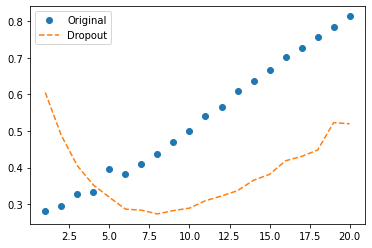

In [ ]:
#results
history_dict = history.history
loss_values = history_dict['val_loss']
loss_values_4 = history4.history['val_loss']

epoch = range (1, len(loss_values)+1)

plt.plot(epoch, loss_values, 'o', label = 'Original')
plt.plot(epoch, loss_values_4, '--', label = 'Dropout')
plt.legend()
plt.show()

Adding all the info

In [ ]:
#Model - sequential  -- less complex
model5 = models.Sequential()
model5.add(layers.Dense(4, activation='relu', input_shape=(10000,),
                        kernel_regularizer=regularizers.l2(0.001)))
model4.add(layers.Dropout(0.5))

model5.add(layers.Dense(4, activation='relu',
           kernel_regularizer=regularizers.l1(0.001)))
model5.add(layers.Dropout(0.5))

model5.add(layers.Dense(1, activation='sigmoid'))

model5.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics='accuracy')

history5 = model5.fit(partial_x_train, partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.6843 - accuracy: 0.5855 - val_loss: 0.6341 - val_accuracy: 0.6962
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.6227 - accuracy: 0.6378 - val_loss: 0.5687 - val_accuracy: 0.8319
Epoch 3/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5728 - accuracy: 0.6925 - val_loss: 0.5170 - val_accuracy: 0.8474
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.5392 - accuracy: 0.7455 - val_loss: 0.4792 - val_accuracy: 0.8627
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.5136 - accuracy: 0.7812 - val_loss: 0.4467 - val_accuracy: 0.8814
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.4990 - accuracy: 0.7899 - val_loss: 0.4215 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 21ms/step - loss: 0.4828 - accuracy: 0.8080 - val_loss: 0.4120 - val_accuracy: 0.8784
Epoch 8/20
30

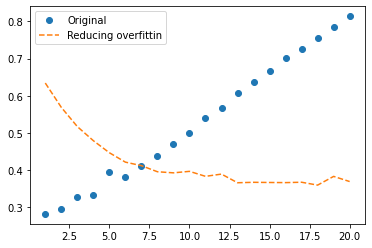

In [ ]:
#results
history_dict = history.history
loss_values = history_dict['val_loss']
loss_values_5 = history5.history['val_loss']

epoch = range (1, len(loss_values)+1)

plt.plot(epoch, loss_values, 'o', label = 'Original')
plt.plot(epoch, loss_values_5, '--', label = 'Reducing overfittin')
plt.legend()
plt.show()